# Descubra as melhores notas de matemática do ENEM 2016
_Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016._


**Tópicos**

Neste desafio você aprenderá:

  - Lógica
  - Análise de dados
  - Estatística
  - Regression

**Detalhes**

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo `train.csv`). **Este arquivo, e apenas ele, deve ser utilizado para todos os desafios**. 

Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo `test.csv` crie um modelo para prever nota da prova de matemática `(coluna NU_NOTA_MT)` de quem participou do **ENEM 2016**.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `NU_NOTA_MT`.

Faça o upload do arquivo `answer.csv` usando o botão **_“Submeter resposta”_**.

**Observações**

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. 

_Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia._

**Prevendo as melhores notas de matemática do ENEM 2016**

In [ ]:
# importando as bibiotecas necessárias
import numpy as np
import pandas as pd
import sklearn 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# verificando as versões das bibliotecas utilizadas
print(f'''\t\tVersões
\tNumpy: {np.__version__}
\tPandas: {pd.__version__}
\tSklearn: {sklearn.__version__}
\tMatplotib: {matplotlib.__version__}
\tSeaborn: {sns.__version__}
''')

		Versões
	Numpy: 1.19.5
	Pandas: 1.1.5
	Sklearn: 0.22.2.post1
	Matplotib: 3.2.2
	Seaborn: 0.11.1



In [ ]:
# atualizando os pacotes se necessário
# !pip install --upgrade numpy
# !pip install --upgrade pandas
# !pip install --upgrade sklearn
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

> # Coleta e análise exploratória dos dados

In [ ]:
# realizando o carregamento do conjunto de dados para google colab
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
# instanciando o conjunto de dados
df_train = pd.read_csv('train.csv', sep=',' , encoding='UTF8' )
df_test = pd.read_csv('test.csv', sep=',' , encoding='UTF8' )

In [ ]:
# verificando a quantidade de linhas e colunas 
print(f'df_train possui {df_train.shape[0]} linhas e {df_train.shape[1]} colunas')
print(f'df_test possui {df_test.shape[0]} linhas e {df_test.shape[1]} colunas')

df_train possui 13730 linhas e 167 colunas
df_test possui 4576 linhas e 47 colunas


In [ ]:
# visualizando as 5 primeiras linhas do df_train
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [ ]:
# visualizando as 5 primeiras linhas do df_test
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [ ]:
# verificando as colunas presentes nos dataframes
print(df_train.columns)
print('')
print(df_test.columns)

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_

In [ ]:
# informações gerais dos datasets
print(df_train.info())
print('')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEI

In [ ]:
# verificando se os dados de teste estão presentes nos dados de treinamento
print(set(df_test.columns).issubset(set(df_train.columns)))

True


In [ ]:
# dados estatísticos do df_train
df_train.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,13730.0,2.288174e+03,1321.230607,0.0,1144.0,2288.0,3432.0,4586.0
NU_ANO,13730.0,2.016000e+03,0.000000,2016.0,2016.0,2016.0,2016.0,2016.0
CO_MUNICIPIO_RESIDENCIA,13730.0,3.088548e+06,989049.517633,1100023.0,2307650.0,3118601.0,3550308.0,5300108.0
CO_UF_RESIDENCIA,13730.0,3.073671e+01,9.862405,11.0,23.0,31.0,35.0,53.0
NU_IDADE,13730.0,2.159381e+01,7.043654,13.0,17.0,19.0,23.0,67.0
TP_ESTADO_CIVIL,13202.0,1.160430e-01,0.365986,0.0,0.0,0.0,0.0,3.0
TP_COR_RACA,13730.0,2.185652e+00,1.007285,0.0,1.0,3.0,3.0,5.0
TP_NACIONALIDADE,13730.0,1.048871e+00,0.258895,0.0,1.0,1.0,1.0,4.0
CO_MUNICIPIO_NASCIMENTO,13121.0,3.057946e+06,970301.967622,1100023.0,2306900.0,3106200.0,3549805.0,5300108.0
CO_UF_NASCIMENTO,13121.0,3.042916e+01,9.670030,11.0,23.0,31.0,35.0,53.0


In [ ]:
# dados estatísticos do df_test
df_test.describe().T.head(15)

,count,mean,std,min,25%,50%,75%,max
CO_UF_RESIDENCIA,4576.0,30.762019,9.912313,11.0,23.0,31.0,35.0,53.0
NU_IDADE,4576.0,21.542395,6.854073,14.0,17.0,19.0,23.0,65.0
TP_COR_RACA,4576.0,2.181163,1.017531,0.0,1.0,3.0,3.0,5.0
TP_NACIONALIDADE,4576.0,1.060970,0.281289,0.0,1.0,1.0,1.0,4.0
TP_ST_CONCLUSAO,4576.0,1.791084,0.875692,1.0,1.0,2.0,2.0,4.0
TP_ANO_CONCLUIU,4576.0,2.119537,3.210353,0.0,0.0,0.0,3.0,10.0
TP_ESCOLA,4576.0,1.368663,0.568589,1.0,1.0,1.0,2.0,3.0
TP_ENSINO,1480.0,1.182432,0.572495,1.0,1.0,1.0,1.0,3.0
IN_TREINEIRO,4576.0,0.127404,0.333461,0.0,0.0,0.0,0.0,1.0
TP_DEPENDENCIA_ADM_ESC,1480.0,2.264865,0.716922,1.0,2.0,2.0,2.0,4.0


In [ ]:
# visualizando a quantidade de pontos na prova de matemática dos participantes do enem
print(f"Média de pontos {df_train['NU_NOTA_MT'].mean():.4f}")
print(f"Máximo de pontos {df_train['NU_NOTA_MT'].max():.4f}")
print(f"Mínimo de pontos {df_train['NU_NOTA_MT'].min():.4f}")

Média de pontos 482.4979
Máximo de pontos 952.0000
Mínimo de pontos 0.0000


In [ ]:
# dados estatísticos somente da prova de matemática
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

<Figure size 864x576 with 0 Axes>

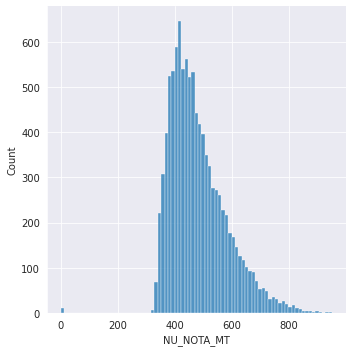

In [ ]:
# plotando gráfico da distribuição dos pontos da prova de matemática
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.displot(df_train.NU_NOTA_MT);

In [ ]:
# verificando os tipos de variáveis presentes  
# e realizando a contagem das colunas presentes com seus respectivos tipos de dados
df_train.dtypes.value_counts()

int64      79
object     60
float64    28
dtype: int64

In [ ]:
# verificando os tipos de variáveis presentes   
# e realizando a contagem das colunas presentes com seus respectivos tipos de dados
df_test.dtypes.value_counts()

int64      20
object     15
float64    12
dtype: int64

In [ ]:
# checando se há valores ausentes e contabilizando
df_test.isnull().value_counts().sum()

4576

In [ ]:
# checando se há valores ausentes e contabilizando
df_train.isnull().value_counts().sum()

13730

In [ ]:
# df_train.isna().sum()

In [ ]:
# df_test.isna().sum()

In [ ]:
# verificação de dados faltantes em relação a totalidade de cada coluna
total = df_train.isnull().sum().sort_values(ascending = False)
percentual = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Dados faltando (%)'])
faltantes.head(15)

,Total,Dados faltando (%)
CO_UF_ENTIDADE_CERTIFICACAO,12092,88.069920
NO_ENTIDADE_CERTIFICACAO,12092,88.069920
SG_UF_ENTIDADE_CERTIFICACAO,12092,88.069920
Q041,10792,78.601602
TP_SIT_FUNC_ESC,9448,68.812819
TP_LOCALIZACAO_ESC,9448,68.812819
TP_DEPENDENCIA_ADM_ESC,9448,68.812819
CO_UF_ESC,9448,68.812819
NO_MUNICIPIO_ESC,9448,68.812819
CO_MUNICIPIO_ESC,9448,68.812819


Como se percebe, a porcentagem de dados faltantes em cada coluna é `altissíma`.



Com a função ``.corr()`` vamos identificar quais as colunas (features) que mais possuem correlação com o target (NU_NOTA_MT).

Iremos também realizar um ``.dropna()`` (excluir valores ausentes) e também um ``.sort_values`` (deixar em ordem crescente) em seguida exibir as 15 primeiras linhas para mostrar as que possuem maior valor de correlação.

In [ ]:
df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False).head(15)

NU_NOTA_MT                 1.000000
NU_NOTA_CN                 0.584941
NU_NOTA_CH                 0.529594
NU_NOTA_LC                 0.494695
NU_NOTA_REDACAO            0.379376
TP_DEPENDENCIA_ADM_ESC     0.373233
NU_NOTA_COMP3              0.350307
NU_NOTA_COMP5              0.343337
NU_NOTA_COMP4              0.342282
NU_NOTA_COMP2              0.335638
NU_NOTA_COMP1              0.299402
CO_MUNICIPIO_NASCIMENTO    0.113416
CO_UF_NASCIMENTO           0.112236
CO_MUNICIPIO_PROVA         0.109433
CO_MUNICIPIO_RESIDENCIA    0.108850
Name: NU_NOTA_MT, dtype: float64

In [ ]:
# instanciando as features principais da base de treino e test

plt.style.use('ggplot')

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

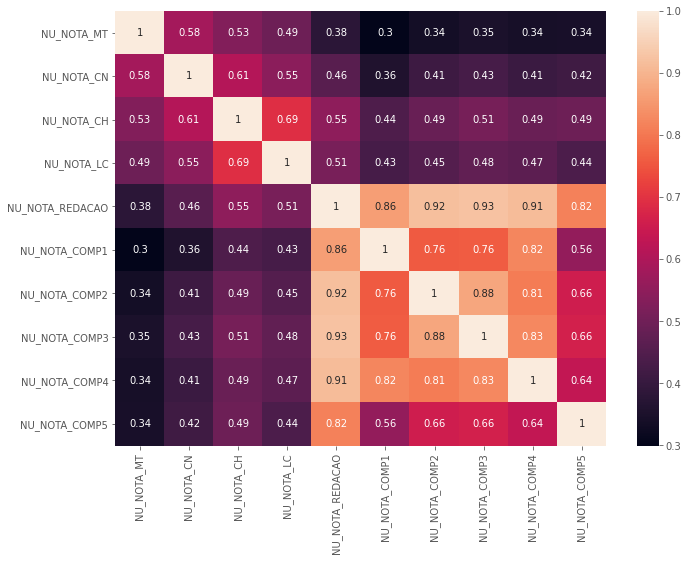

In [ ]:
# plotando gráfico de calor para uma melhor visualização da correlação do df_train
corr_train = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr_train,  annot=True, annot_kws={"size": 10});

In [ ]:
# realizando um groupby para agrupar os dados por sexo e visualizando sua totalidade
df_train.groupby('TP_SEXO').size()

TP_SEXO
F    8491
M    5239
dtype: int64

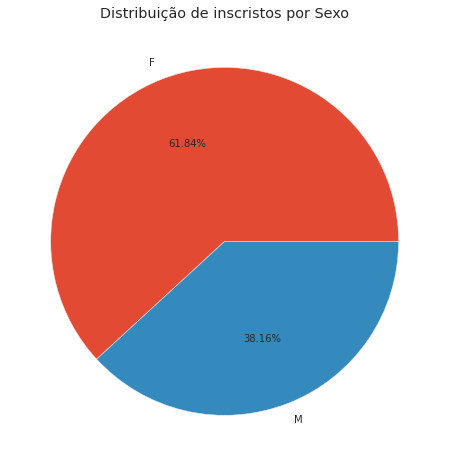

In [ ]:
# plotando o gráfico de pie para visualizar a relação de distribuição entre os gêneros
genero = df_train.groupby('TP_SEXO').size()

genero.plot(kind='pie', subplots=True, figsize=(14, 8), autopct='%1.2f%%')
plt.title('Distribuição de inscristos por Sexo')
plt.ylabel('')
plt.show()

In [ ]:
# agrupando sexo e com a idade e realizando contagem
df_train.groupby('TP_SEXO')['NU_IDADE'].value_counts()

TP_SEXO  NU_IDADE
F        17          1686
         18          1397
         19           868
         16           685
         20           607
                     ... 
M        65             2
         56             1
         63             1
         64             1
         66             1
Name: NU_IDADE, Length: 103, dtype: int64

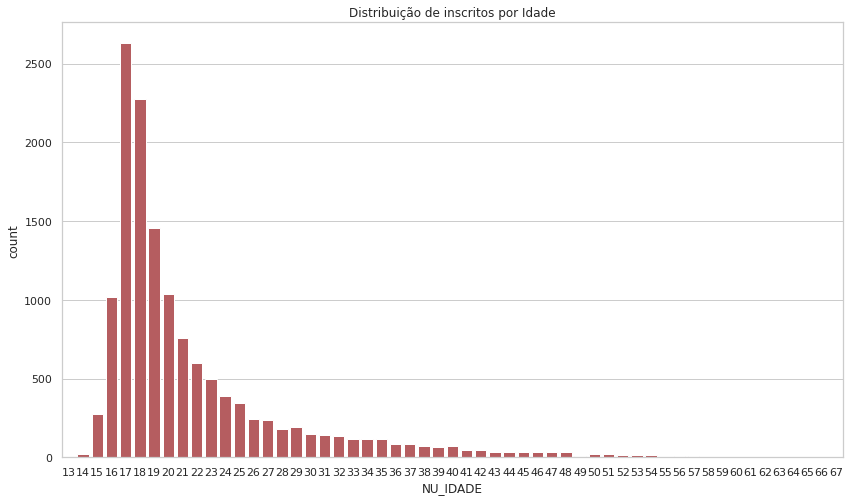

In [ ]:
# plotando o gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(14,8))
plt.title('Distribuição de inscritos por Idade')
sns.countplot(x='NU_IDADE', color = 'r', data=df_train)
plt.show()

In [ ]:
# df_train.groupby('TP_SEXO')['NU_IDADE'].unique()

In [ ]:
# contando a quantidade de estados 
estados = df_train['SG_UF_RESIDENCIA'].unique()
len(estados)

27

In [ ]:
# agrupando q quantidade por estados
df_train.groupby('SG_UF_RESIDENCIA')['SG_UF_RESIDENCIA'].count().sort_values(ascending=False).head(27)

SG_UF_RESIDENCIA
SP    2138
CE    1785
MG    1374
BA     912
RJ     804
PR     637
PE     619
PA     594
MA     593
RS     556
GO     502
PB     316
PI     292
AM     274
SC     273
ES     272
MT     271
RN     258
DF     232
AL     210
MS     187
SE     183
TO     167
RO     108
AP      73
AC      67
RR      33
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
# inscritos = df_train.groupby('SG_UF_RESIDENCIA')['SG_UF_RESIDENCIA'].count().sort_values(ascending=False)

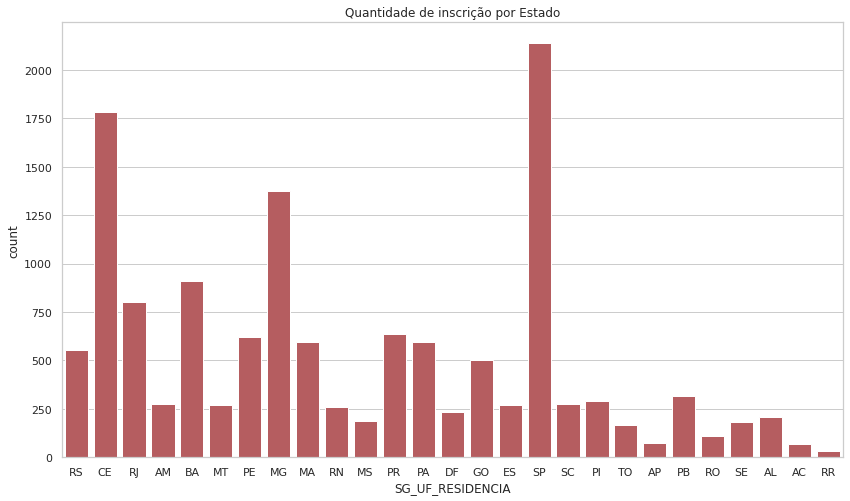

In [ ]:
# plotando o gráfico
sns.set(style='whitegrid')
plt.figure(figsize=(14,8))
plt.title('Quantidade de inscrição por Estado')
sns.countplot(x='SG_UF_RESIDENCIA', color = 'r', data=df_train)
plt.show()

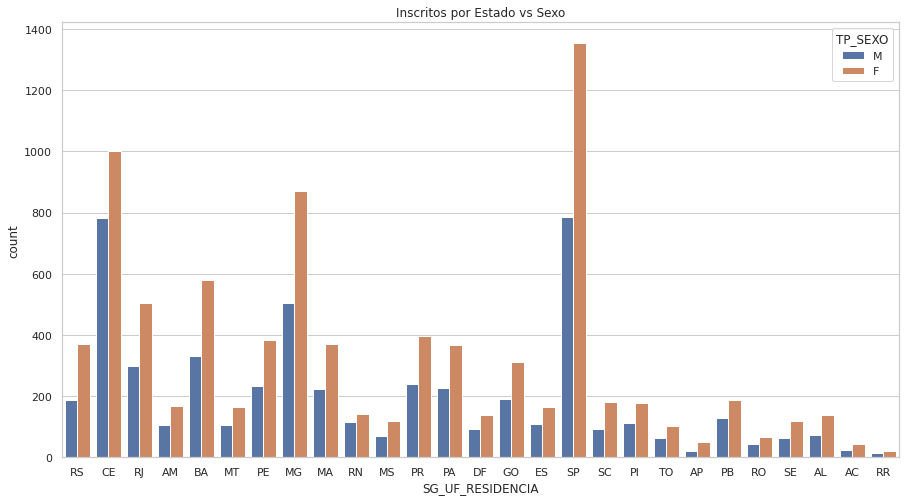

In [ ]:
# separando o sexo presente em cada estado
plt.figure(figsize=(15,8))
plt.title('Inscritos por Estado vs Sexo')
sns.countplot(x='SG_UF_RESIDENCIA', hue='TP_SEXO', data=df_train)
plt.show()

In [ ]:
# # verificando se há valores nulos nas features e contabilizando-os
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
dtype: int64

In [ ]:
# inserindo a coluna da nota de matématica na features
features.append('NU_NOTA_MT')

In [ ]:
# verificando novamente se há valores nulos e contabilizando-os
# agora com a coluna "NU_NOTA_MT" 
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_MT         3597
dtype: int64

**Realizando um pré-tratamento dos dados**

Será necessário um tratamento adequado para este problema. A príncipio não podemos exclui-los, pois diminuírimos em muito o nosso conjunto de dados.

Aqui vamos adotar duas estratégias para solução deste problema. São elas:

- 1) vamos preencher os valores faltantes das colunas com `zero`. E para isto, iremos utlizar a função `.fillna` e com argumento `(0, inplace=True)`.

- 2) e na segunda, vamos preencher os valores faltantes com a média de cada coluna. E também atribuir este resultado na variável `media`. Para posteriormente, passar como argumento da função.

Porém antes de tudo isso, iremos realizar uma cópia de cada conjunto de dados para não sobrescreve-lo e, a partir dessa etapa iremos realizar o seu devido tratamento.

In [ ]:
# realizando uma cópia de cada conjunto de dados
df_train_01 = df_train.copy()
df_test_01 = df_test.copy()

In [ ]:
# vamos realizar o preenchimento dos dados faltantes com zero
df_train_01.fillna(0, inplace=True)
df_test_01.fillna(0, inplace=True)

In [ ]:
# realizando novamente uma cópia de cada conjunto de dados
df_train_02 = df_train.copy()
df_test_02 = df_test.copy()

In [ ]:
# vamos realizar o preenchimento dos dados faltantes com o valor da média
media_train = df_train_02.mean()
media_test = df_test_02.mean()

In [ ]:
# atribuindo os valores para onde há valores faltantes
df_train_02.fillna(value=media_train, inplace=True)
df_test_02.fillna(value=media_test, inplace=True)

In [ ]:
df_train_01.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,0,0,0.0,0.0,0.0,0.0,0.0,5,5,1,1,1,1,1,0.0,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,0,0,0.0,0.0,0.0,0.0,0.0,5,5,5,5,5,5,5,0.0,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,0.0,A,A,A,A,A,A,A,A,A


In [ ]:
df_train_02.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,1.178888,0,3.121720e+07,3.123638e+06,NaN,31.085474,NaN,2.259692,1.030827,1.001635,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.00000,5.000000,1.000000,0.000000,0.000000,5,5,0,5,5,5,5,5.000000,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.000000,0,2.300516e+07,2.304707e+06,Granja,23.000000,CE,2.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,3.83336,2.608812,4.375984,4.530217,3.962858,5,5,1,1,1,1,1,3.671545,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,1.178888,0,3.121720e+07,3.123638e+06,NaN,31.085474,NaN,2.259692,1.030827,1.001635,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,3.83336,2.608812,4.375984,4.530217,3.962858,5,5,5,5,5,5,5,3.671545,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,1.178888,0,3.121720e+07,3.123638e+06,NaN,31.085474,NaN,2.259692,1.030827,1.001635,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.00000,0.000000,5.000000,5.000000,5.000000,5,5,5,5,2,5,5,5.000000,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,1.178888,0,3.121720e+07,3.123638e+06,NaN,31.085474,NaN,2.259692,1.030827,1.001635,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.00000,4.000000,3.000000,5.000000,4.000000,5,5,4,3,1,4,5,3.671545,A,A,A,A,A,A,A,A,A


> # **Aplicando as técnicas para solução do problema**

In [ ]:
# criando um data frame vazio para salvar as repostas
df_answer = pd.DataFrame()

In [ ]:
df_answer.head()

""


In [ ]:
# salvando os dados das inscrições
df_answer['NU_INSCRICAO'] = df_test['NU_INSCRICAO']
df_answer.head()

,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


In [ ]:
df_answer.shape

(4576, 1)

In [ ]:
features

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_MT']

In [ ]:
features_corr

['NU_NOTA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

> # **Para os nossos primeiros testes irei utilizar o dataset preenchido com a zero**

In [ ]:
# removendo a coluna "NU_NOTA_MT"
features.remove('NU_NOTA_MT')

In [ ]:
features

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [ ]:
# # convertendo as variáveis categóricas para variávies númericas
# for col in df_train_01.select_dtypes(include='float64').columns:
#   df_train_01[col] = df_train_01[col].astype('category')

#   # imprimindo o mapeamento
#   print(col, '\t', dict(enumerate(df_train_01[col].cat.categories)), end='\n\n')

#   df_train_01[col] = df_train_01[col].cat.codes

In [ ]:
# # convertendo as variáveis categóricas para variávies númericas
# for col in df_test_01.select_dtypes(include='float64').columns:
#   df_test_01[col] = df_test_01[col].astype('category')

#   # imprimindo o mapeamento
#   print(col, '\t', dict(enumerate(df_test_01[col].cat.categories)), end='\n\n')

#   df_test_01[col] = df_test_01[col].cat.codes

In [ ]:
# importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import (cross_val_score, 
                                    RandomizedSearchCV,
                                     KFold, 
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import sklearn.metrics as metrics
from sklearn.metrics import (mean_squared_error, 
                             classification_report, 
                             # confusion_matrix, 
                             # plot_confusion_matrix, 
                             roc_curve)

from IPython.display import Image
from sklearn.pipeline import Pipeline

In [ ]:
# criando uma função para validar a performance dos modelos
def validaModel(modelos,x_train,y_train):
  results = []
  names = []
  
  # treinando os modelos
  for name, modelo in modelos:
    # calcula as métricas 
    k_fold = KFold(n_splits=5, random_state=21, shuffle=True)
    cv_metr = cross_val_score(modelo, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
    

    results.append(cv_metr)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_metr.mean(), cv_metr.std())
    print(msg)



In [ ]:
# criando um pipeline com os modelos desejados
modelos = []

modelos.append(('LinRegr', Pipeline([('Scaler', MinMaxScaler()),
                                            ('LinRegr',LinearRegression())])))
modelos.append(('DTreeRegr', Pipeline([('Scaler', MinMaxScaler()),
                                              ('DTreeRegr', DecisionTreeRegressor())])))
modelos.append(('RForRegr', Pipeline([('Scaler', MinMaxScaler()),
                                             ('RForRegr', RandomForestRegressor())])))
modelos.append(('GradBRegr', Pipeline([('Scaler', MinMaxScaler()),
                                              ('GradBRegr', GradientBoostingRegressor())])))
modelos.append(('LinearSVR', Pipeline([('Scaler', MinMaxScaler()),
                                              ('LinearSVR', LinearSVR())])))
modelos.append(('KNRegr', Pipeline([('Scaler', MinMaxScaler()),
                                           ('KNRegr', KNeighborsRegressor())])))
modelos.append(('GridSCV', Pipeline([('Scaler', MinMaxScaler()),
                                            ('GridSCV', GridSearchCV(RandomForestRegressor(), 
                                                                     {'min_samples_leaf':[1,10],
                                                                      'min_samples_split':[2,10],
                                                                      'n_estimators':[20,50,150,400]}))])))                    

In [ ]:
# visualizando os parâmetros dos modelos instanciados
modelos

[('LinRegr', Pipeline(memory=None,
           steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                  ('LinRegr',
                   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                    normalize=False))],
           verbose=False)), ('DTreeRegr', Pipeline(memory=None,
           steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                  ('DTreeRegr',
                   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                         max_depth=None, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort=

In [ ]:
X_train = df_train_01[features]
y_train = df_train_01['NU_NOTA_MT']
X_test = df_test_01[features]

In [ ]:
validaModel(modelos, X_train, y_train)

LinRegr: -5106.374243 (141.025295)
DTreeRegr: -8452.009930 (427.584100)
RForRegr: -4363.240990 (75.102951)
GradBRegr: -4073.269213 (66.518386)
LinearSVR: -5756.760053 (90.647833)
KNRegr: -5080.134168 (79.273690)
GridSCV: -4167.681160 (70.114396)


Como resultado, temos os algoritmos que apresentaram melhor performance (valor de erro médio menor). Em ordem de performance, são eles:

    - GradientBoostingRegressor : -4073.269213 (66.518386);
    - GridSearchCV: -4167.681160 (70.114396) e o,
    - RandomForestRegressor: -4363.240990 (75.102951).

**Obs.:** _O_ `GridSearchCV`, _você precisa ter um pouco de paciência, já que demanda um tempo considerável para realizar suas estimativas._

Agora irei gerar os arquivos de respostas no `df_answer`, e para isso utlizarei os algoritmos de melhor perfomance. Cada qual irei gerar uma cópia distinta.


**GradientBoostRegressor**

In [ ]:
# instanciando o modelo na variável "model_GBM"
model_GBM = Pipeline([('scaler',  StandardScaler()),
                      ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [ ]:
# randomizando o modelo
CV_model_GBM = RandomizedSearchCV(estimator = model_GBM, 
                                  param_distributions = {},cv = 5,
                                  return_train_score=True, verbose=0)

In [ ]:
# realizando o treinamento do modelo
# aplicando-o na base de teste e salvando na variável
CV_model_GBM.fit(X_train, y_train)
y_pred = CV_model_GBM.predict(X_test)

In [ ]:
# salvando o resultado no "df_answer"
df_answer['NU_NOTA_MT'] = np.around(y_pred,2)

In [ ]:
# verificando as 5 primeiras linhas do arquivo salvo
df_answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,435.60
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,452.25
2,b38a03232f43b11c9d0788abaf060f7366053b6d,591.81
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.41
4,715494628a50142ce8cb17191cfe6d0f3cae0934,542.59


In [ ]:
# salvando o arquivo em formato de ".csv"
df_answer.to_csv('answer.csv', index=False, header=True)

**GridSearchCV**

In [ ]:
model_GSCV = Pipeline([('Scaler', MinMaxScaler()),
                       ('GridSCV', GridSearchCV(RandomForestRegressor(),
                                                {'min_samples_leaf':[1,10],
                                                 'min_samples_split':[2,10],
                                                 'n_estimators':[20,50,150,400]}))])

In [ ]:
CV_model_GSCV = RandomizedSearchCV(estimator = model_GSCV, 
                                   param_distributions = {},cv = 5,
                                   return_train_score=True, verbose=0)

In [ ]:
CV_model_GSCV.fit(X_train, y_train)
y_pred_02 = CV_model_GSCV.predict(X_test)

In [ ]:
df_answer['NU_NOTA_MT'] = np.around(y_pred_02,2)

In [ ]:
df_answer.to_csv('answer_02.csv', index=False, header=True)

**RandomForestRegressor**

In [ ]:
model_RFR = Pipeline([('scaler',  StandardScaler()),
                      ('RandomForestRegressor', RandomForestRegressor())])

In [ ]:
CV_model_RFR = RandomizedSearchCV(estimator = model_RFR, 
                                  param_distributions = {},cv = 5,
                                  return_train_score=True, verbose=0)

In [ ]:
CV_model_RFR.fit(X_train, y_train)
y_pred_03 = CV_model_RFR.predict(X_test)

In [ ]:
df_answer['NU_NOTA_MT'] = np.around(y_pred_03,2)

In [ ]:
df_answer.to_csv('answer_03.csv', index=False, header=True)

`Dando continuidade...`

> # **Realizando os testes com o dataset preenchido com a média**

In [ ]:
X_train_02 = df_train_02[features]
y_train_02 = df_train_02['NU_NOTA_MT']
X_test_02 = df_test_02[features]

In [ ]:
validaModel(modelos, X_train_02, y_train_02)

LinRegr: -6586.799719 (93.346140)
DTreeRegr: -8451.945057 (383.751152)
RForRegr: -4392.510064 (82.504129)
GradBRegr: -4128.173813 (92.829696)
LinearSVR: -7143.911003 (99.886818)
KNRegr: -5092.765745 (107.891856)
GridSCV: -4295.482018 (114.346825)


Como resultado novamente, por ordem de performance temos os mesmos algoritmos (valor de erro médio menor). 
Porém, usando a base de dados com a `média` preenchidas para valores faltantes, os modelos apresentaram uma pequena piora em suas performances em relação ao teste anterior. São eles:

    - GradientBoostingRegressor : -4128.173813 (92.829696);
    - GridSearchCV: -4295.482018 (114.346825) e o,
    - RandomForestRegressor: -4392.510064 (82.504129).

Novamente vamos gerar os arquivos de resposta.

**GradientBoostRegressor**

In [ ]:
# instanciando o modelo na variável "model_GBM"
model_GBM_02 = Pipeline([('scaler', StandardScaler()),
                      ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [ ]:
# randomizando o modelo
CV_model_GBM_02 = RandomizedSearchCV(estimator = model_GBM_02, 
                                  param_distributions = {},cv = 5,
                                  return_train_score=True, verbose=0)

In [ ]:
# realizando o treinamento do modelo
# aplicando-o na base de teste e salvando na variável
CV_model_GBM_02.fit(X_train_02, y_train_02)
y_pred_04 = CV_model_GBM_02.predict(X_test_02)

In [ ]:
# salvando o resultado no "df_answer"
df_answer['NU_NOTA_MT'] = np.around(y_pred_04,2)

In [ ]:
# salvando o arquivo em formato de ".csv"
df_answer.to_csv('answer_04.csv', index=False, header=True)

**GridSearchCV**

In [ ]:
model_GSCV_02 = Pipeline([('Scaler', MinMaxScaler()),
                       ('GridSCV', GridSearchCV(RandomForestRegressor(),
                                                {'min_samples_leaf':[1,10],
                                                 'min_samples_split':[2,10],
                                                 'n_estimators':[20,50,150,400]}))])

In [ ]:
CV_model_GSCV_02 = RandomizedSearchCV(estimator = model_GSCV_02, 
                                   param_distributions = {},cv = 5,
                                   return_train_score=True, verbose=0)

In [ ]:
CV_model_GSCV_02.fit(X_train_02, y_train_02)
y_pred_05 = CV_model_GSCV.predict(X_test_02)

In [ ]:
df_answer['NU_NOTA_MT'] = np.around(y_pred_05,2)

In [ ]:
df_answer.to_csv('answer_05.csv', index=False, header=True)

In [ ]:
arq_resposta = pd.read_csv('answer_05.csv')
arq_resposta.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,433.23
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.24
2,b38a03232f43b11c9d0788abaf060f7366053b6d,599.45
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,455.09
4,715494628a50142ce8cb17191cfe6d0f3cae0934,531.19


**RandomForestRegressor**

In [ ]:
model_RFR_02 = Pipeline([('scaler',  StandardScaler()),
                      ('RandomForestRegressor', RandomForestRegressor())])

In [ ]:
CV_model_RFR_02 = RandomizedSearchCV(estimator = model_RFR_02, 
                                  param_distributions = {},cv = 5,
                                  return_train_score=True, verbose=0)

In [ ]:
CV_model_RFR_02.fit(X_train_02, y_train_02)
y_pred_06 = CV_model_RFR.predict(X_test_02)

In [ ]:
df_answer['NU_NOTA_MT'] = np.around(y_pred_06,2)

In [ ]:
df_answer.to_csv('answer_06.csv', index=False, header=True)

> ## **Para o algoritmo `GridSearchCV`, como forma de curiosidade irei realizar um experimento à parte.**

`Vamos lá!`

**O intuito é descobrir os melhores parâmetros e seu melhor estimador.**

  - Irei aplica-lo tanto na base preenchida com `zero` como com a `media`.

>> **Primeira parte**

In [ ]:
# base de dados com posições faltantes preenchidas com zero
X_train = df_train_01[features]
y_train = df_train_01['NU_NOTA_MT']
X_test = df_test_01[features]

In [ ]:
# importando as bibliotecas necessárias
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# especificando os parâmetros de tunning:
parametros = {'min_samples_leaf':[1,10],
              'min_samples_split':[2,10],
              'n_estimators':[100,250,500,750]}

In [ ]:
# instanciando o RandomForestRegressor e o GridSearchCV 
rfr = RandomForestRegressor()
grid = GridSearchCV(rfr, parametros)

In [ ]:
# executando o grid
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
# verificando os melhores parâmetros
grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 250}

In [ ]:
# recuperando o melhor estimador
rfr_best =grid.best_estimator_

In [ ]:
# gerando o resultado final
result_final = rfr_best.predict(X_test)
result_final

array([432.85925728, 440.48667995, 598.06163548, ..., 691.57445829,
       471.12947565,   0.        ])

In [ ]:
# instanciando o resultado no "df_answer"
df_answer['NU_NOTA_MT'] = np.around(result_final,2)
df_answer

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,432.86
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,440.49
2,b38a03232f43b11c9d0788abaf060f7366053b6d,598.06
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.00
4,715494628a50142ce8cb17191cfe6d0f3cae0934,530.64
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,451.30
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,481.47
4573,655fa6306720ff16e825903b5422a46608a77545,691.57
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,471.13


In [ ]:
# salvando o arquivo
df_answer.to_csv('answer_07.csv', index=False, header=True)

>> **Segunda parte**

In [ ]:
# base de dados com posições faltantes preenchidas com a média
X_train = df_train_02[features]
y_train = df_train_02['NU_NOTA_MT']
X_test = df_test_02[features]

`As etapas de instanciar e definir os parâmetros foi feita acima e, portanto utilizaremos as mesmas definições`

In [ ]:
# executando o grid
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
# verificando os melhores parâmetros
grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 250}

In [ ]:
# recuperando o melhor estimador
rfr_best =grid.best_estimator_

In [ ]:
# gerando o resultado final
result_final_02 = rfr_best.predict(X_test)
result_final_02

array([431.1082834 , 446.59461114, 596.59797849, ..., 686.63936027,
       468.25943646, 475.40624102])

In [ ]:
# instanciando o resultado no "df_answer"
df_answer['NU_NOTA_MT'] = np.around(result_final_02,2)

In [ ]:
# salvando o arquivo
df_answer.to_csv('answer_08.csv', index=False, header=True)

## **Vamos aplicar uma técnica para ver quais** `features` **tem forte relacionamento com o** `target`

## **Feature Importance**

Métodos ensembles como o algoritmo `Random Forest`, podem ser usados para estimar a importância de cada atributo. Ele retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.

In [ ]:
X_train = df_train_01[features]
y_train = df_train_01['NU_NOTA_MT']
X_test = df_test_01[features]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.feature_importances_

array([0.06748255, 0.02621445, 0.88131088, 0.0069952 , 0.00309547,
       0.00314249, 0.0032515 , 0.00342535, 0.00508211])

In [ ]:
model.n_features_

9

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       13730 non-null  float64
 1   NU_NOTA_CH       13730 non-null  float64
 2   NU_NOTA_LC       13730 non-null  float64
 3   NU_NOTA_REDACAO  13730 non-null  float64
 4   NU_NOTA_COMP1    13730 non-null  float64
 5   NU_NOTA_COMP2    13730 non-null  float64
 6   NU_NOTA_COMP3    13730 non-null  float64
 7   NU_NOTA_COMP4    13730 non-null  float64
 8   NU_NOTA_COMP5    13730 non-null  float64
dtypes: float64(9)
memory usage: 965.5 KB


### O `Scikit-learn` fornece a função **SelectBest()** que pode ser usada com diversos testes estatísticos. Informamos para o parâmetro `k` o número de recursos a serem selcionados como os mais imprtantes.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
f_regression = SelectKBest(score_func=f_regression, k=9)
fit = f_regression.fit(X_train, y_train)
features = fit.transform(X_train)

In [ ]:
features

array([[436.3, 495.4, 581.2, ..., 120. ,  80. ,  80. ],
       [474.5, 544.1, 599. , ..., 120. , 120. ,  80. ],
       [  0. ,   0. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [460.5, 528.9, 569.3, ..., 120. , 120. , 120. ],
       [422.5, 621.7, 569. , ...,  80. ,  80. , 100. ],
       [488.7, 575.3, 565.9, ...,  80. , 120. ,  80. ]])

In [ ]:
cols = fit.get_support(indices=True)
X_train.iloc[:, cols]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,436.3,495.4,581.2,520.0,120.0,120.0,120.0,80.0,80.0
1,474.5,544.1,599.0,580.0,140.0,120.0,120.0,120.0,80.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13725,438.2,419.7,394.5,440.0,120.0,120.0,80.0,80.0,40.0
13726,423.8,557.9,533.0,560.0,120.0,120.0,120.0,120.0,80.0
13727,460.5,528.9,569.3,600.0,120.0,120.0,120.0,120.0,120.0
13728,422.5,621.7,569.0,460.0,100.0,100.0,80.0,80.0,100.0


> ## **Segue material de consulta**

**Prevendo a Demanda de Alugueis de Bicicletas com Machine Learning**

- https://minerandodados.com.br/prevendo-a-demanda-de-alugueis-de-bicicletas-com-machine-learning/

- https://minerandodados.com.br/o-que-sao-pipelines-e-para-que-serve-isso-automatize-suas-etapas-de-machine-learning/

- https://minerandodados.com.br/pipelines-machine-learning/



- https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

- https://minerandodados.com.br/aprenda-como-selecionar-features-para-seu-modelo-de-machine-learning/